# Lab #3 (Numerical integration)
### By Stakhov K.V. [8.1212]

### 1. Using scipy’s quad function, write a program that solves the following integral numerically: `I = ∫[0..1]cos(2*π*x)dx`.

In [1]:
from math import cos, sin, exp, pi
from scipy.integrate import quad

def print_result(result, interval):
    a, b = interval
    I, err = result
    print(
        "Numerical integration result:\n",
        f"∫[{a}..{b}]f(x)dx ≈ {I} ± {err}"
    )

f = lambda x: cos(2 * pi * x)
a, b = 0, 1

print_result(quad(f, a, b), (a, b))

Numerical integration result:
 ∫[0..1]f(x)dx ≈ 4.163336342344337e-17 ± 7.116990625963435e-15


### 2. Find the analytical integral and compare it with the numerical solution.  

Analytical solution:

$$   \int_0^1 cos(2 \pi x) = \frac{\sin(2 \pi  x) }{2 \pi } |_0^1 = \frac{\sin(2 \pi) }{2 \pi } - 0 = 0 $$  

As we can see, numerical solution has an error of $\sim4.16^{-17}$, which is less than was estimated by the `scipy.integrate.quad()` function.

### 3. Why is it important to have an estimate of the accuracy (or the error) of the numerical integral?

This is important because this allows to assess the reliability of the computed result and the suitability of the chosen numerical integration algorithm for the given function.  

Moreover, having an estimate of the error can be useful to determine the optimal number of sample points to use in the selected numerical integration method. By adjusting the number of sample points, the accuracy of the computed result can be refined until the desired level of precision is reached.

### 4. It is a good practice to plot the integrand function to check whether it is “well behaved” before you attempt to integrate. Write a function with name plotquad which takes the same arguments as the quad command (i.e. f, a and b) and which (I) creates a plot of the integrand f(x) and (II) computes the integral numerically using the quad function. The return values should be as for the quad function.

Numerical integration result:
 ∫[0..1]f(x)dx ≈ 4.163336342344337e-17 ± 7.116990625963435e-15
Numerical integration result:
 ∫[-5..1]f(x)dx ≈ -3.3869073219417913 ± 2.1642736278851433e-11
Numerical integration result:
 ∫[-1..5]f(x)dx ≈ 42.78885834486345 ± 6.503190434076211e-11


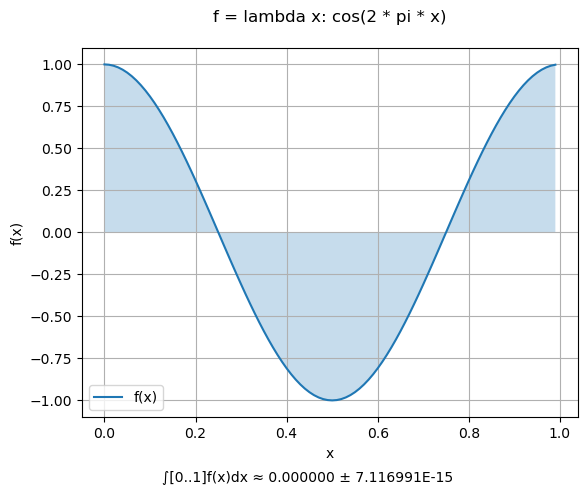

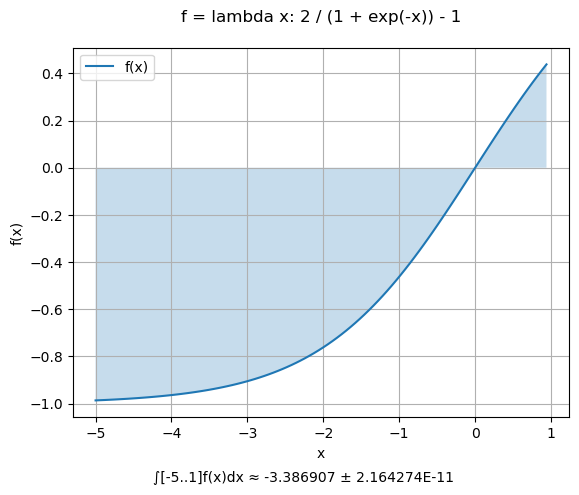

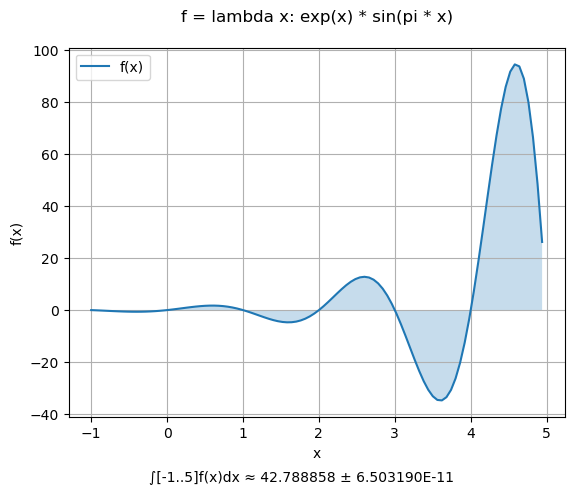

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

def plotquad(f, a, b):
    # Integrate f(x) numerically on [a, b]
    I, err = quad(f, a, b)
    # Create plot point arrays and plot the function
    x = np.arange(a, b, (b - a) / 100)
    f_x = np.array([f(xi) for xi in x])
    fig, ax = plt.subplots()
    ax.plot(x, f_x, label = "f(x)")
    ax.fill_between(x, f_x, alpha = 0.25)
    ax.set(xlabel = 'x', ylabel = "f(x)", title = f"{inspect.getsourcelines(f)[0][0]}")
    ax.grid()
    ax.legend()
    fig.text(0.25, -0.025, f"∫[{a}..{b}]f(x)dx ≈ {I:.6f} ± {err:.6E}")
    fig.show()
    return I, err

# Test with the function from task 1
print_result(plotquad(f, a, b), (a, b))

# Test with other functions
a, b = -5, 1
f = lambda x: 2 / (1 + exp(-x)) - 1
print_result(plotquad(f, a, b), (a, b))

a, b = -1, 5
f = lambda x: exp(x) * sin(pi * x)
print_result(plotquad(f, a, b), (a, b))